In [471]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [472]:
df = web.DataReader('HINDUNILVR.NS', data_source='yahoo', start='2020-01-01', end='2022-05-01')
# df

In [473]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-01,1939.900024,1918.000000,1930.000000,1936.550049,543035.0,1877.706543
2020-01-02,1952.599976,1930.000000,1940.000000,1938.050049,663275.0,1879.160889
2020-01-03,1940.000000,1918.750000,1937.900024,1927.449951,1598825.0,1868.882935
2020-01-06,1929.400024,1911.250000,1927.349976,1915.449951,683129.0,1857.247437
2020-01-07,1931.000000,1918.000000,1919.250000,1920.699951,808935.0,1862.338013
...,...,...,...,...,...,...
2022-04-25,2162.000000,2047.000000,2100.000000,2100.750000,2437310.0,2100.750000
2022-04-26,2157.949951,2121.000000,2142.199951,2148.350098,1447088.0,2148.350098
2022-04-27,2152.399902,2103.500000,2147.800049,2145.100098,2214481.0,2145.100098


In [474]:
df.shape


(579, 6)

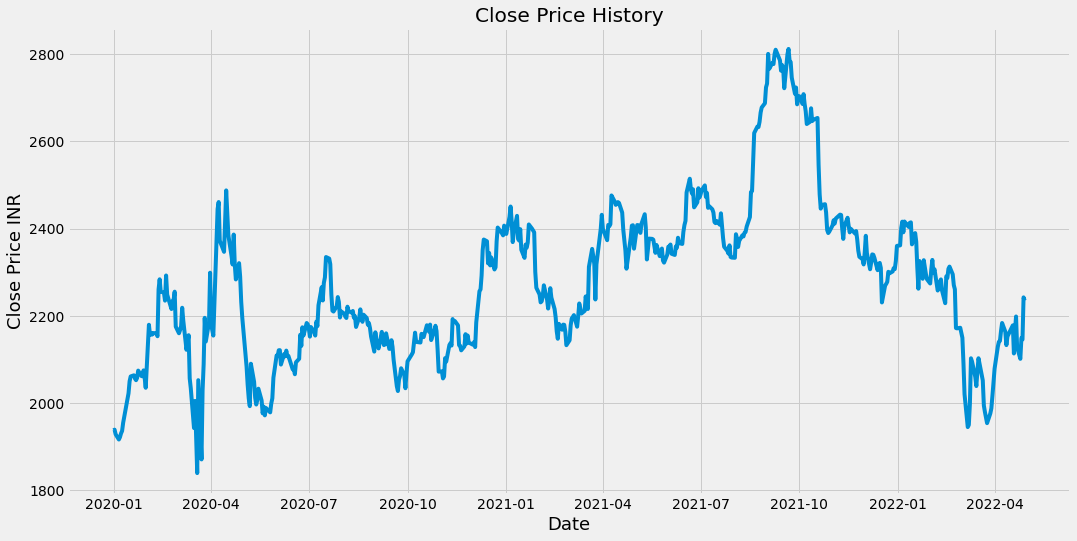

In [475]:
#visualise the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [476]:
#Create a new dataframe with only close column
data = df.filter(['Close'])
dataset = data.values #converting to numpy array
#get the no of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

464

In [477]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.10085717],
       [0.10239697],
       [0.09151559],
       [0.07919716],
       [0.08458647],
       [0.09346603],
       [0.09931736],
       [0.11877017],
       [0.16070414],
       [0.1750244 ],
       [0.18821536],
       [0.21654773],
       [0.227891  ],
       [0.23050872],
       [0.22286083],
       [0.21906269],
       [0.22440063],
       [0.24164649],
       [0.22896892],
       [0.22819902],
       [0.24215976],
       [0.22563268],
       [0.20114969],
       [0.34968941],
       [0.32571994],
       [0.33054461],
       [0.32654097],
       [0.33018522],
       [0.32951807],
       [0.32269146],
       [0.43324959],
       [0.45691105],
       [0.4278089 ],
       [0.42529394],
       [0.40661078],
       [0.46589324],
       [0.42082841],
       [0.38684996],
       [0.40578975],
       [0.4084586 ],
       [0.42770615],
       [0.34537801],
       [0.32967195],
       [0.33706296],
       [0.3465073 ],
       [0.38977569],
       [0.35990339],
       [0.290

In [478]:
len(scaled_data)

579

In [479]:
#Create the training dataset
#Create the scaled training dataset

train_data = scaled_data[0: training_data_len, :]
#Split the data into X_train and Y_train data sets

x_train = []
y_train = []

for i in range(30, len(train_data)):
    x_train.append(train_data[i - 30 : i, 0 ])
    y_train.append(train_data[i, 0])
#     if i<= 60:
#         print(x_train)
#         print(y_train)
#         print()

In [480]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(434, 30)

In [481]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) #(1345, 60, 1)
x_train.shape

(434, 30, 1)

In [482]:
#Build the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1))) #(60, 1)

model.add(LSTM(50, return_sequences=False, ))
model.add(Dense(25))
model.add(Dense(1))

In [483]:
#Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [484]:
#train the model

model.fit(x_train, y_train, batch_size=64, epochs=100)

Epoch 1/100
7/7 [==============================] - 6s 46ms/step - loss: 0.1057
Epoch 2/100
7/7 [==============================] - 0s 43ms/step - loss: 0.0252
Epoch 3/100
7/7 [==============================] - 0s 44ms/step - loss: 0.0186
Epoch 4/100
7/7 [==============================] - 0s 47ms/step - loss: 0.0125
Epoch 5/100
7/7 [==============================] - 0s 46ms/step - loss: 0.0113
Epoch 6/100
7/7 [==============================] - 0s 50ms/step - loss: 0.0092
Epoch 7/100
7/7 [==============================] - 0s 45ms/step - loss: 0.0087
Epoch 8/100
7/7 [==============================] - 0s 46ms/step - loss: 0.0082
Epoch 9/100
7/7 [==============================] - 0s 46ms/step - loss: 0.0077
Epoch 10/100
7/7 [==============================] - 0s 48ms/step - loss: 0.0074
Epoch 11/100
7/7 [==============================] - 0s 47ms/step - loss: 0.0072
Epoch 12/100
7/7 [==============================] - 0s 49ms/step - loss: 0.0069
Epoch 13/100
7/7 [==============================]

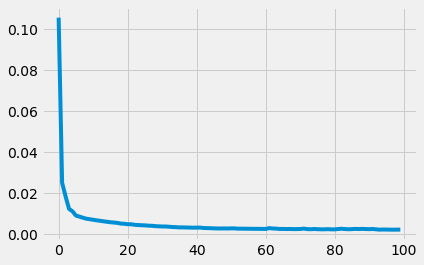

In [485]:
loss = model.history.history['loss']
plt.plot(loss)

In [486]:
#Create the testing data set

#Create a new array containing scaled values from index 1345 to end

test_data = scaled_data[training_data_len - 30 : , :]

#create the datasets x_test and y_test

x_test = []
y_test = dataset[training_data_len: , :] #this will contain the actual values

for i in range(30, len(test_data)):
    x_test.append(test_data[i - 30: i, 0])

In [487]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [488]:
#Reshape the datra
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [489]:
#get the models predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #we want predictions to contain the same values as y_test dataset



In [490]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

12.050303583559783

<ipython-input-491-e1db9ab83fe0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


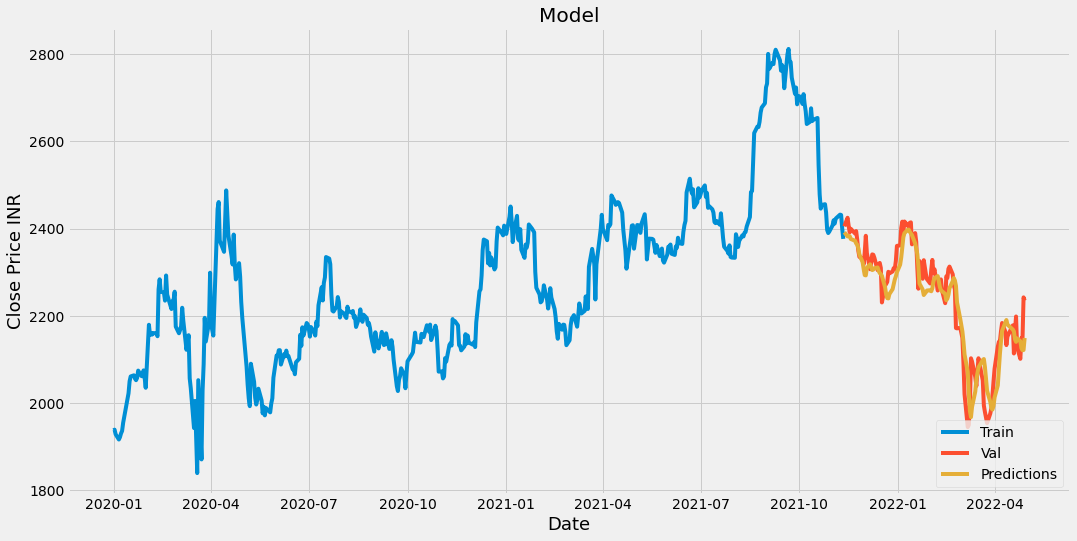

In [491]:
#Plot the data
train = data[0: training_data_len]
valid = data[training_data_len: ]
valid['Predictions'] = predictions

#Visulaize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [492]:
#Show the valid and predicted prices

valid

,Close,Predictions
Date,,
2021-11-12,2404.949951,2391.322266
2021-11-15,2424.750000,2381.947998
2021-11-16,2406.649902,2383.265625
2021-11-17,2391.149902,2382.255615
2021-11-18,2399.399902,2375.966553
...,...,...
2022-04-25,2100.750000,2141.293213
2022-04-26,2148.350098,2125.033447
2022-04-27,2145.100098,2120.575439


In [495]:
#try and predict closing price at may 02 2022
quote = web.DataReader('HINDUNILVR.NS', data_source='yahoo', start='2012-01-01', end='2022-05-01')
#create new dataframe

new_df = quote.filter(['Close'])

#get last 60day closing price values and convert the dataframe to an array
last_60_days = new_df[-30: ].values


#scale the data
last_60_days_scaled = scaler.transform(last_60_days)

x_test1 = []
x_test1.append(last_60_days_scaled)

#convert x_test to numpy array
x_test1 = np.array(x_test1)

#reshape
x_test1 = np.reshape(x_test1, (x_test1.shape[0], x_test1.shape[1], 1))
# print(x_test)

# print(x_test)
#get the predicted scaled price
pred_price = model.predict(x_test1)

#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[2179.8926]]


In [496]:
quote2 = web.DataReader('HINDUNILVR.NS', data_source='yahoo', start='2022-05-02', end='2022-05-02')
print(quote2['Close'])

Date
2022-05-02    2230.5
Name: Close, dtype: float64


In [498]:
dataa = web.DataReader('HINDUNILVR.NS', data_source='yahoo', start='2012-01-01', end='2022-05-01')

close = dataa.filter(['Close'])

#get last 60day closing price values and convert the dataframe to an array
last_60_days = close[-30: ].values

#scale the data
last_60_days_scaled = scaler.transform(last_60_days)

x_input = []
x_input.append(last_60_days_scaled)

#convert x_input to numpy array
x_input = np.array(x_input)

#reshape

x_input = np.reshape(x_input, (x_input.shape[0], x_input.shape[1], 1))

pred_price = model.predict(x_input)

#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
# print(x_input.shape)
    
temp_input=list(x_input)

temp_input=temp_input[0].tolist()
# print(x_input)
# print(temp_input)

[[2179.8926]]


In [222]:
close2 = close.tail(60)


In [223]:
# x_test

In [500]:
from numpy import array

lst_output=[]
n_steps=30
i=0
while(i<30):
    
    if(len(temp_input)>30):
        x_input=np.array(temp_input[1:], dtype=object).astype("float32")
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
#         print(x_input)
#         print(yhat)
        temp_input.append(yhat[0].tolist())
        temp_input=temp_input[1:]
        
        #print(temp_input)
        
        lst_output.append(yhat[0].tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
#         print(x_input)
#         print(yhat)
        temp_input.append(yhat[0].tolist())
        lst_output.append(yhat[0].tolist())
        i=i+1

In [201]:
# lst_output

In [115]:
lst_output = scaler.inverse_transform(lst_output)

In [262]:
# lst_output

In [501]:
plot_new = np.arange(1, 101)
plot_pred = np.arange(101, 131)

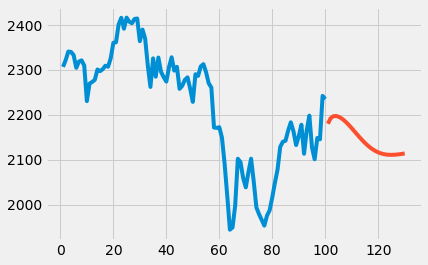

In [502]:
plt.plot(plot_new , scaler.inverse_transform(scaled_data[479:]))
plt.plot(plot_pred, scaler.inverse_transform(lst_output))

In [503]:
ds_new = scaled_data.tolist()

In [504]:
len(scaled_data)

579

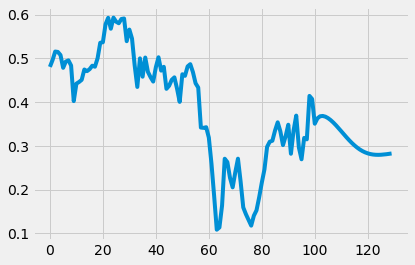

In [505]:
ds_new.extend(lst_output)
plt.plot(ds_new[479: ])

In [506]:
final_graph = scaler.inverse_transform(ds_new).tolist()

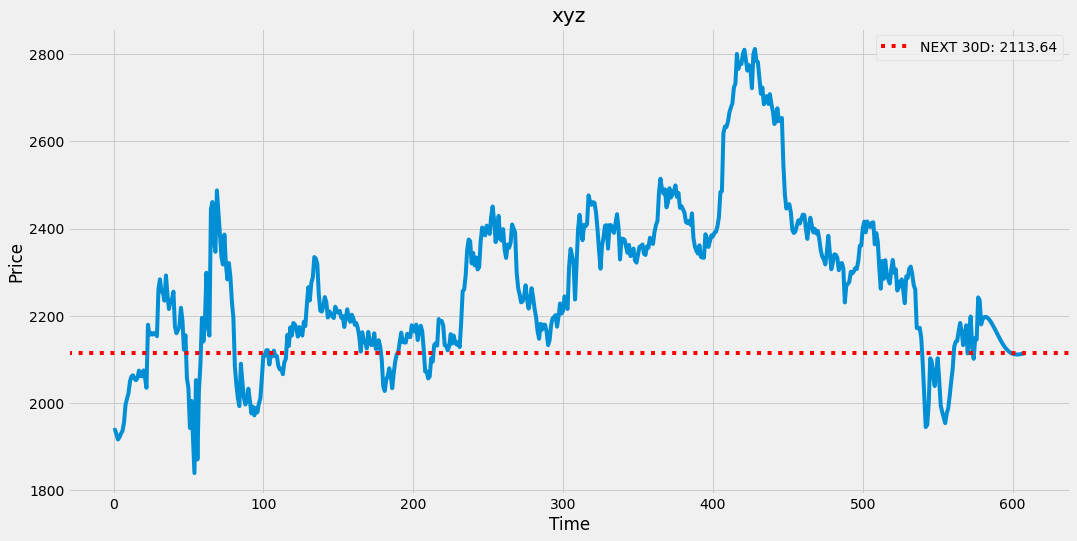

In [507]:
plt.figure(figsize=(16,8))
plt.plot(final_graph, )

plt.ylabel("Price")
plt.xlabel("Time")
plt.title("xyz")
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()


In [259]:
# print(lst_output)

In [258]:
# listtt

In [280]:
#Plot the data
# train = data[0: training_data_len]
# valid = data[training_data_len: ]
# valid['Predictions'] = predictions
# close2['next'] = lst_output

# #Visulaize the data
# plt.figure(figsize=(20,8))
# plt.title('Model')
# plt.xlabel('Date', fontsize = 18)
# plt.ylabel('Close Price INR', fontsize=18)
# plt.plot(train['Close'])
# plt.plot(valid[['Close','Predictions']])
# plt.plot(close2['next'])

# plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
# plt.show()

In [260]:
# dataa2 = web.DataReader('GAIL.NS', data_source='yahoo', start='2012-01-01', end='2022-04-18')
# # dataa2 = dataa2['Close'][-100:]
# dataa 2 = dataa2['Close']

In [211]:
# list1 = dataa2 + lst_output


In [366]:
model.save('ITC2.h5')

In [261]:
# plt.figure(figsize=(5, 4))
# plt.plot(dataa2)
# plt.plot(lst_output)
# plt.show()

In [251]:
current = []
next30 = []
symbol = []

#Axis
data = web.DataReader('AXISBANK.NS', data_source='yahoo', start='2022-03-01', end='2022-04-15')
data = data['Close']
current.append(round(data[0]))
next30.append(round(data[29]))
symbol.append("AXISBANK")

data = web.DataReader('BPCL.NS', data_source='yahoo', start='2022-03-01', end='2022-04-15')
data = data['Close']
current.append(round(data[0]))
next30.append(round(data[29]))
symbol.append("BPCL")

data = web.DataReader('ITC.NS', data_source='yahoo', start='2022-03-01', end='2022-04-15')
data = data['Close']
current.append(round(data[0]))
next30.append(round(data[29]))
symbol.append("ITC")

data = web.DataReader('TITAN.NS', data_source='yahoo', start='2022-03-01', end='2022-04-15')
data = data['Close']
current.append(round(data[0]))
next30.append(round(data[29]))
symbol.append("TITAN")

data = web.DataReader('WIPRO.NS', data_source='yahoo', start='2022-03-01', end='2022-04-15')
data = data['Close']
current.append(round(data[0]))
next30.append(round(data[29]))
symbol.append("WIPRO")


print(current)
print(next30)
print(symbol)



[750, 342, 215, 2593, 555]
[793, 379, 270, 2461, 559]
['AXISBANK', 'BPCL', 'ITC', 'TITAN', 'WIPRO']


In [256]:
def findP(current, next30):
    p = []
    for i in range(len(current)):
        inc = ((next30[i] - current[i]) / current[i]) * 100
        p.append(round(inc, 1))
        
    return p

In [257]:
ans = findP(current, next30)
print(ans)

[5.7, 10.8, 25.6, -5.1, 0.7]


In [514]:

def yearly(symbol):
    import statistics
    percentages = []
    for i in range(2017, 2022):
        data = web.DataReader(f"{symbol}.NS", data_source='yahoo', start=f'{i}-01-01', end=f'{i}-12-31')
        data = data['Close']
        percentage_inc = ((data[len(data) - 1] - data[0]) / data[0]) * 100
        percentages.append(percentage_inc)
        
    
    return statistics.fmean(percentages)
        
        



In [518]:
symbols = ['AXISBANK', 'BPCL', 'ITC', 'HINDUNILVR', 'COALINDIA', 'ASIANPAINT', 'WIPRO', 'TECHM', 'HEROMOTOCO', 'CIPLA', 'RELIANCE']

avg_inc = []
index = []

for i in range(len(symbols)):
    avg_inc.append(yearly(symbols[i]))
    
print(avg_inc)

    

[9.486513509473767, 0.9719351756197684, -1.9087238724276445, 26.076924246725998, -12.550032762899864, 30.861984007768854, 35.677714221906115, 32.765446720279016, -1.3967261875930141, 14.079724378815897, 35.99683962147297]


In [520]:
print("Stocks with average increase > 15% (last 5 years): ")

for i in range(len(avg_inc)):
    if(round(avg_inc[i]) > 15):
        print(symbols[i])

Stocks with average increase > 15% (last 5 years): 
HINDUNILVR
ASIANPAINT
WIPRO
TECHM
RELIANCE
